In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
from scipy.stats import linregress

In [2]:
plt.rcParams["figure.figsize"] = [15,10]

In [54]:
def openImage(route_name, rot=False, flip=False, resize=False):
    gray = PIL.Image.open(route_name).convert('L')
    #gray = gray.rotate(90)
    if resize:
        #gray = gray.resize((400,400))
        gray = gray.resize((500,500))
        gray = np.array(gray)
        backgroud = np.ones((800,800)) * gray.max()
        #backgroud[200:-200, 200:-200] = gray
        backgroud[150:-150, 150:-150] = gray
        gray = backgroud
        backgroud = np.ones((1000,1000)) * gray.max()
        backgroud[100:-100, 100:-100] = gray
        gray = backgroud
    else:
        gray = gray.resize((500,500))
        gray = np.array(gray)
        backgroud = np.ones((1000,1000)) * gray.max()
        backgroud[250:-250, 250:-250] = gray
        gray = backgroud
    if rot:
        gray = np.rot90(gray)
    if flip:
        gray = np.flip(gray)
    return gray

In [55]:
def calc_dimension(gray, plot=True):
    if plot:
        plt.imshow(gray,cmap='gray')
    calc=[]
    for t in 2**np.array((range(5,8))):
        r = gray.shape[0] // t
        n = r*r
        x = 0
        y = 0

        frag_select = []
        coord_select = []
        for i in range(r):
            for j in range(r):
                if ((gray[x:x+t, y:y+t].mean() != 255)):
                    #print(gray[x:x+t, y:y+t].mean())
                    coord_select.append([[y,y,y+t,y+t,y],[x,x+t,x+t,x,x]])
                    frag_select.append(gray[x:x+t, y:y+t])    
                y = y + t
            x = x + t
            y = 0
        if plot:
            a = plt.imshow(gray,cmap='gray')
            #plt.plot(np.array(coord_select)[0,0],np.array(coord_select)[0,1],'r.')
            for i in range(np.shape(coord_select)[0]):
                plt.plot(np.array(coord_select)[i,0],np.array(coord_select)[i,1],'r-',lw=0.4)
            #currentAxis.add_patch(Rectangle((0 - 0.1, 0 - 0.1), 0.2, 0.2, alpha=1, facecolor='blue'))
            plt.show()
        calc.append([t,np.shape(coord_select)[0]])
    return np.array(calc)

In [56]:
def show(calc_1, calc_2, title=''):
    fig, axes = plt.subplots(2, 2)
    
    fig.suptitle(title)
    
    axes = axes.reshape(-1)
    axes[0].imshow(gray_1,cmap='gray')
    axes[1].imshow(gray_2,cmap='gray')



    axes[2].plot(calc_1[:,0],calc_1[:,1],'-b')
    axes[2].plot(calc_2[:,0],calc_2[:,1],'-r')

    #axes[2].xlabel("box size")
    #axes[2].ylabel("box count")

    calc_log_1 = np.array(list(map(lambda x: [math.log(1/x[0]),math.log(x[1])] ,calc_1)))
    calc_log_2 = np.array(list(map(lambda x: [math.log(1/x[0]),math.log(x[1])] ,calc_2)))

    axes[3].plot(calc_log_1[:,0], calc_log_1[:,1],'-b')
    axes[3].plot(calc_log_1[:,0], calc_log_1[:,1],'ob')

    axes[3].plot(calc_log_2[:,0], calc_log_2[:,1],'-r')
    axes[3].plot(calc_log_2[:,0], calc_log_2[:,1],'or')

    #axes[3].xlabel("log(box size)")
    #axes[3].ylabel("log(1/box count)")

    res1 = linregress(calc_log_1[:,0],calc_log_1[:,1])
    res2 = linregress(calc_log_2[:,0],calc_log_2[:,1])
    diff = np.abs(res1.slope - res2.slope)
    print(diff)
    axes[3].set_title('diff {}'.format(diff))
    plt.show()

0.09828615388901762


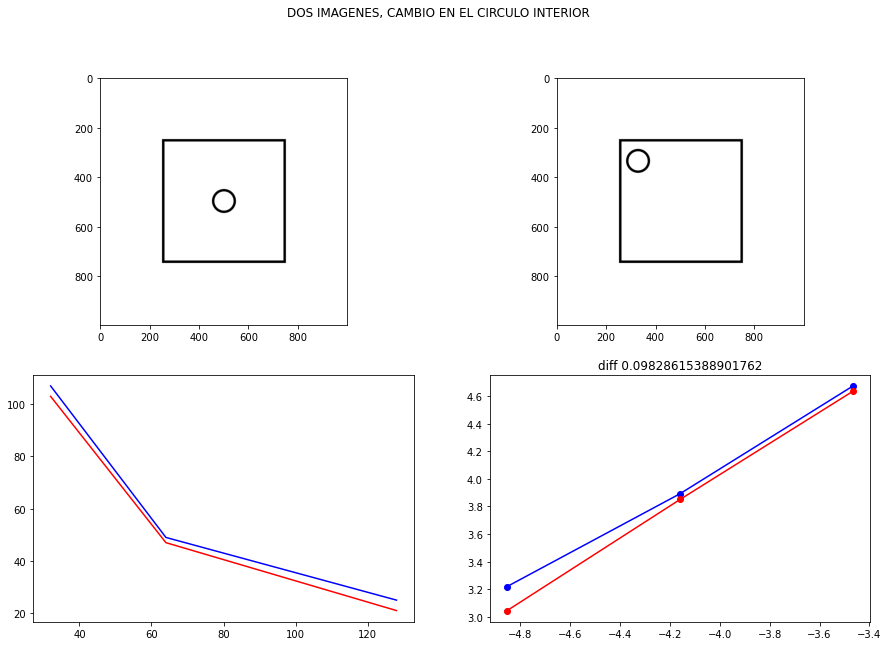

In [57]:
gray_1 = openImage('test_1.png', rot=True)
calc_1 = calc_dimension(gray_1, False)
gray_2 = openImage('test_2.png', rot=True)
calc_2 = calc_dimension(gray_2, False)

show(calc_1, calc_2, "DOS IMAGENES, CAMBIO EN EL CIRCULO INTERIOR")

0.04653638249134362


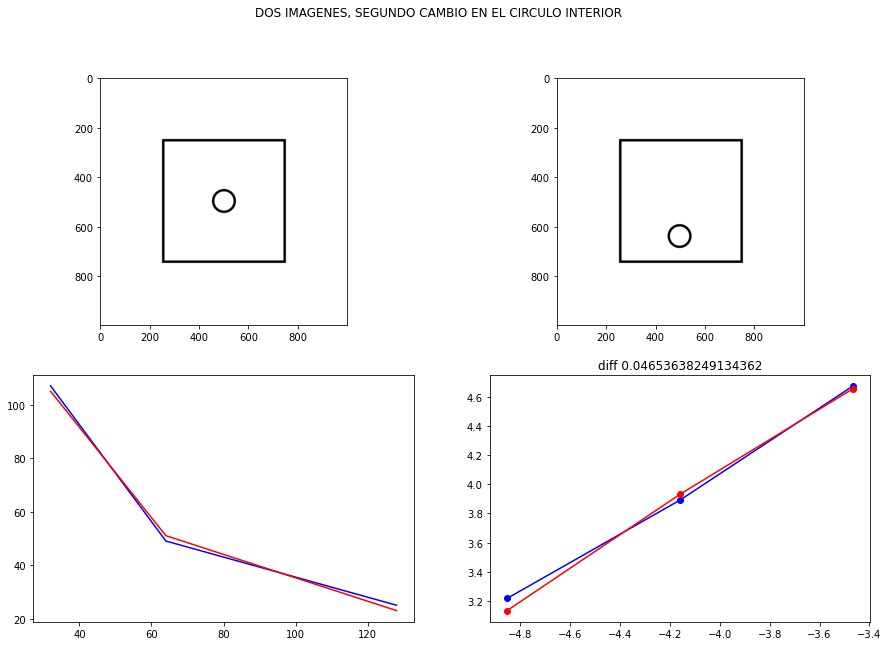

In [58]:
gray_1 = openImage('test_1.png')
calc_1 = calc_dimension(gray_1, False)
gray_2 = openImage('test_3.png')
calc_2 = calc_dimension(gray_2, False)

show(calc_1, calc_2, "DOS IMAGENES, SEGUNDO CAMBIO EN EL CIRCULO INTERIOR")

0.10003487600713168


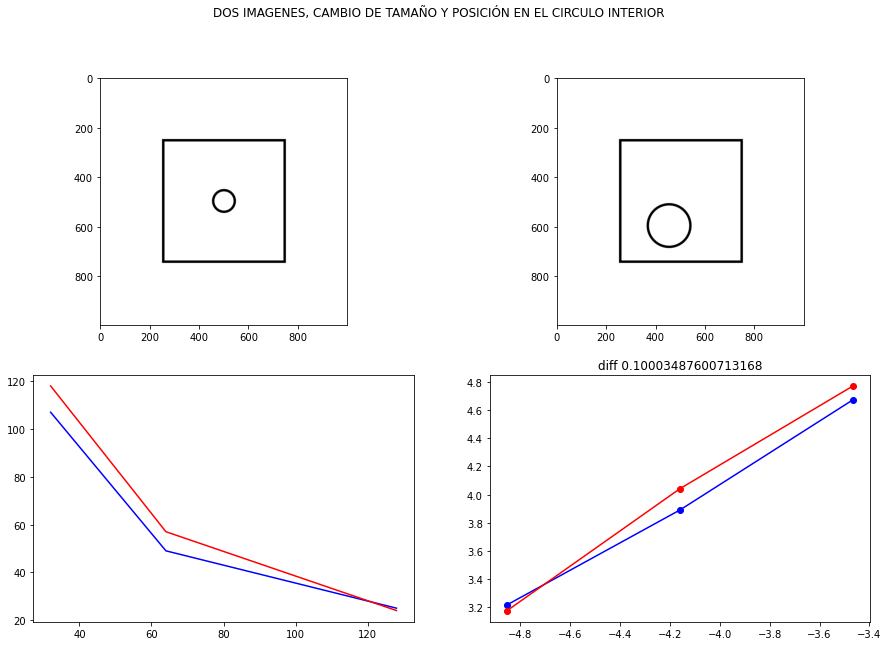

In [59]:
gray_1 = openImage('test_1.png')
calc_1 = calc_dimension(gray_1, False)
gray_2 = openImage('test_4.png')
calc_2 = calc_dimension(gray_2, False)

show(calc_1, calc_2, "DOS IMAGENES, CAMBIO DE TAMAÑO Y POSICIÓN EN EL CIRCULO INTERIOR")

0.0


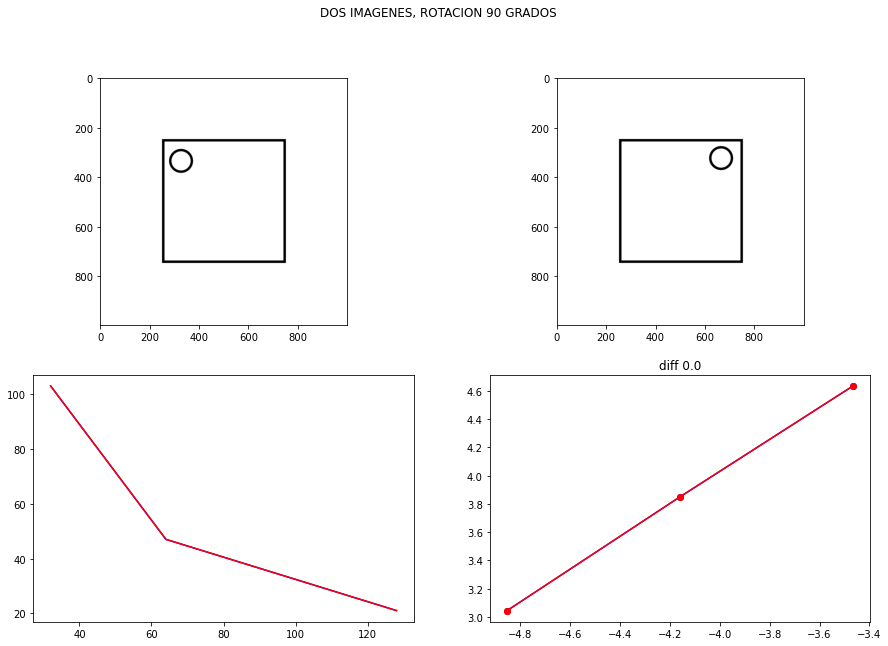

In [60]:
gray_1 = openImage('test_2.png', True)
calc_1 = calc_dimension(gray_1, False)
gray_2 = openImage('test_2.png')
calc_2 = calc_dimension(gray_2, False)

show(calc_1, calc_2, "DOS IMAGENES, ROTACION 90 GRADOS")

0.0


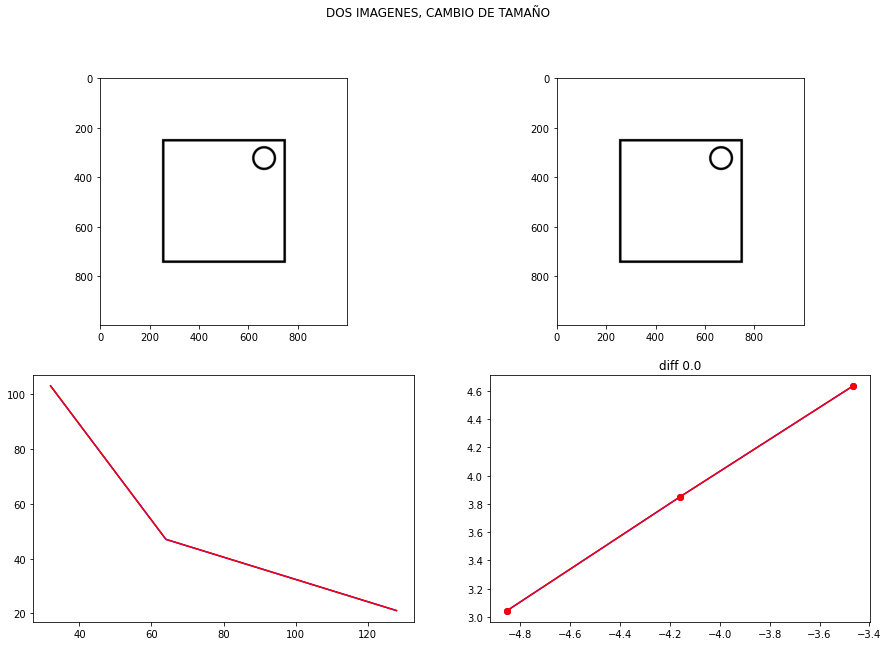

In [62]:
gray_1 = openImage('test_2.png', resize=True)
calc_1 = calc_dimension(gray_1, False)
gray_2 = openImage('test_2.png')
calc_2 = calc_dimension(gray_2, False)
show(calc_1, calc_2, "DOS IMAGENES, CAMBIO DE TAMAÑO")